# Perform EDA on data captured in DB

In [1]:
import pandas as pd

In [2]:
# comments_df = pd.read_csv("data/comments.csv", index_col = 0, encoding = "utf_8")
comments_df = pd.read_csv("data/2020_5_28_Comments.csv", index_col = 0, encoding = "utf_8")

In [3]:
comments_df.shape

(17211, 9)

In [4]:
comments_df.describe(include = "all")

,insert_update_ts,id,link_id,subreddit_name,author,body,score,permalink,retrieved
count,17211,17211,17211,17211,17211,17211,17211.000000,17211,17211
unique,2221,17211,1721,18,12953,16777,NaN,17211,2220
top,2020-05-28 16:27:16,fs3lna1,t3_gs7gqn,news,AutoModerator,b'###[Meta] Sticky Comment\n\n[Rule 2](https:/...,NaN,/r/melbourne/comments/grcjuk/small_business/fr...,2020-05-28 20:27:16
freq,22,1,1358,3065,322,165,NaN,1,22
mean,NaN,NaN,NaN,NaN,NaN,NaN,17.660450,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,250.581138,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,-150.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN


## NaN or NULL values are indicated with body = "b'[deleted]'"

In [5]:
comments_df.isna().sum()

insert_update_ts    0
id                  0
link_id             0
subreddit_name      0
author              0
body                0
score               0
permalink           0
retrieved           0
dtype: int64

In [6]:
deleted_body_index = comments_df[comments_df["body"]== "b'[deleted]'"].index

In [7]:
no_author_index = comments_df[comments_df["author"]== "None"].index

> ### Also, accounts that have been deleted or (possibly) suspended in some way show up with "author" set to "None"

In [8]:
deleted_body_index.isin(no_author_index).sum()

121

> ### In fact, all of the current records with deleted body content are a subset of the records with no author. In order to cover both possible scenarios we'll filter out records where the body content has been deleted and where the author has been set to "None".

In [9]:
comments_df = comments_df[(comments_df["author"] != "None")&(comments_df["body"] != "b'[deleted]'")]

In [10]:
comments_df.shape

(17001, 9)

### Most common authors

In [11]:
round(comments_df["author"].value_counts(normalize = True),4)[:10] # the authors autotldr & AutoModerator are bots :)

AutoModerator      0.0189
photography_bot    0.0052
TotesMessenger     0.0051
autotldr           0.0038
kickstand          0.0015
darkbluexanadu     0.0011
fraqtl             0.0009
lazypieceofcrap    0.0009
eshbunny           0.0009
Darthlentils       0.0009
Name: author, dtype: float64

In [12]:
comments_df = comments_df[
    (comments_df["author"] != "autotldr")&
    (comments_df["author"] != "AutoModerator")&
    (comments_df["author"] != "photography_bot")
]

In [13]:
comments_df.shape

(16527, 9)

## Add linguistic features

In [14]:
import textstat

In [15]:
comments_df["body_len"] = comments_df.apply(lambda x: len(x["body"]), axis = 1)

In [16]:
comments_df["sent_count"] = comments_df.apply(lambda x: textstat.sentence_count(x["body"]), axis = 1)
comments_df["flesch_read"] = comments_df.apply(lambda x: textstat.flesch_reading_ease(x["body"]), axis = 1)
comments_df["difficult_words"] = comments_df.apply(lambda x: textstat.difficult_words(x["body"]), axis = 1)
comments_df["read_index"] = comments_df.apply(lambda x: textstat.automated_readability_index(x["body"]), axis = 1)
comments_df["syllable_count"] = comments_df.apply(lambda x: textstat.syllable_count(x["body"]), axis = 1)
comments_df["text_standard"] = comments_df.apply(lambda x: textstat.text_standard(x["body"], float_output = True), axis=1)

In [17]:
comments_df.sample(3)

,insert_update_ts,id,link_id,subreddit_name,author,body,score,permalink,retrieved,body_len,sent_count,flesch_read,difficult_words,read_index,syllable_count,text_standard
13976,2020-05-28 14:31:56,fs3wcmd,t3_gs7gqn,worldnews,just-my-piercings,"b""Least you wouldn't have to put up with his d...",1,/r/worldnews/comments/gs7gqn/if_us_president_d...,2020-05-28 18:31:56,184,2,88.06,3,8.0,40,8.0
13733,2020-05-28 14:19:32,fs3uple,t3_gs3wlq,todayilearned,todaysredditaccount5,b'I have been pointing this out on Reddit for ...,1,/r/todayilearned/comments/gs3wlq/til_the_term_...,2020-05-28 18:19:32,133,1,73.51,4,12.6,29,9.0
942,2020-05-28 13:27:39,fr48yb6,t3_gm8ru2,glasgow,Torran_Toi,"b""Are we talking about storage or utility cupb...",1,/r/glasgow/comments/gm8ru2/tenement_storage_cu...,2020-05-28 17:27:39,495,1,1.11,16,43.9,124,11.0


In [18]:
comments_df.groupby("subreddit_name").mean()

,score,body_len,sent_count,flesch_read,difficult_words,read_index,syllable_count,text_standard
subreddit_name,,,,,,,,
AskCulinary,6.889961,312.922780,2.700772,66.190849,7.312741,14.423166,73.158301,9.003861
AskHistorians,4.800000,1805.777778,8.244444,24.037111,55.666667,28.100000,441.133333,16.688889
FalseFlagWatch,2.107317,274.795122,1.858537,37.524244,7.287805,24.248293,59.956098,9.995122
MRActivism,1.520000,199.000000,1.600000,44.988800,5.520000,17.240000,47.120000,9.440000
MensRights,9.867021,215.602394,1.805851,52.857633,6.208777,16.768883,51.123670,9.500000
MilitaryConspiracy,1.477477,642.594595,2.747748,29.206667,18.873874,25.794595,140.603604,11.459459
PedoGate,7.196629,181.891386,1.756554,48.022940,4.876404,21.218165,41.779026,10.069288
conspiracy,2.723380,244.674769,2.035880,54.847581,7.260417,16.616898,57.318287,9.863426
glasgow,7.293680,219.125155,2.009913,67.573259,5.395291,14.000000,50.913259,8.345725


In [19]:
comments_df.describe()

,score,body_len,sent_count,flesch_read,difficult_words,read_index,syllable_count,text_standard
count,16527.000000,16527.000000,16527.000000,16527.000000,16527.000000,16527.000000,16527.000000,16527.000000
mean,18.353906,242.054275,2.104012,56.497023,6.646215,16.579186,57.078478,9.514915
std,255.685527,388.644866,2.343546,411.558465,10.970884,122.706893,93.138375,57.530510
min,-150.000000,4.000000,1.000000,-51400.190000,0.000000,-4.300000,1.000000,-3.000000
25%,1.000000,62.000000,1.000000,52.870000,1.000000,6.550000,14.000000,5.000000
50%,1.000000,126.000000,1.000000,71.240000,3.000000,10.300000,29.000000,7.000000
75%,4.000000,271.000000,2.000000,85.690000,8.000000,16.200000,64.000000,11.000000
max,14163.000000,9581.000000,75.000000,121.220000,324.000000,15150.000000,2508.000000,7183.000000


### Distributions for Score

In [20]:
import matplotlib.pyplot as plt

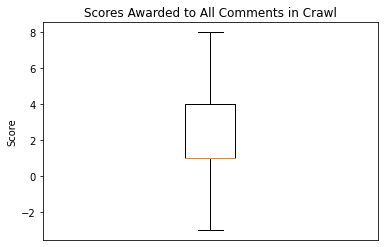

In [21]:
# boxlot for all Subreddits in crawl

plt.boxplot(x = comments_df["score"], showfliers = False);
plt.tick_params(labelbottom = False, bottom = False)
plt.ylabel("Score");
plt.title(label = "Scores Awarded to All Comments in Crawl");

In [22]:
# np.mean(comments_df["score"]), np.median(comments_df["score"]), np.min(comments_df["score"]), np.max(comments_df["score"]), np.max(comments_df["score"])-np.min(comments_df["score"])
# q75, q25 = np.percentile(comments_df["score"], [75 ,25])
# q75 - q25

In [23]:
import math

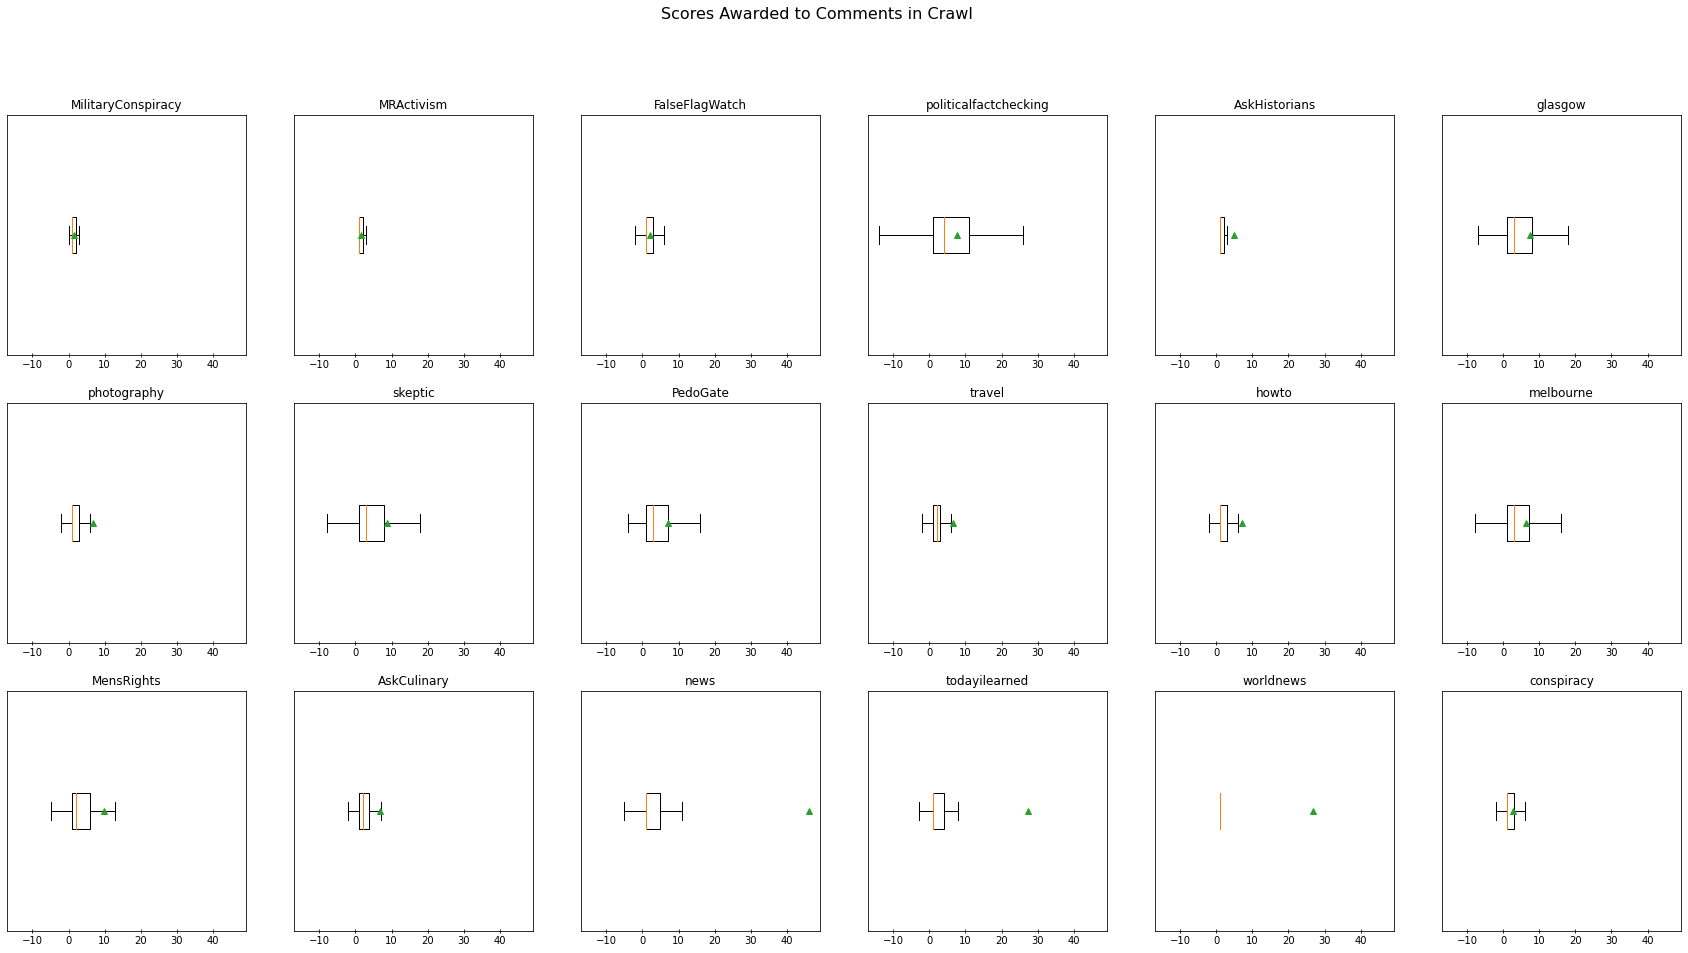

In [24]:
# multiple boxplots for individual Subreddits in crawl

subreddit_list = comments_df["subreddit_name"].unique()

fig, axs = plt.subplots(nrows = 3, ncols = 6, sharex = True, sharey = True, figsize = (30,15));
fig.suptitle("Scores Awarded to Comments in Crawl", fontsize = 16);
counter = 0
for row in axs:
    for subplot in row:
        try:
            temp_df = comments_df[comments_df["subreddit_name"] == subreddit_list[counter]]
            subplot.boxplot(x = temp_df["score"], showfliers = False, vert = False, showmeans = True)
            subplot.tick_params(labelbottom = True, bottom = True, labelleft = False, left = False, direction = "inout")
            subplot.set_title(subreddit_list[counter])
            counter += 1
        except Exception as e:
            continue

> ### Comments have a mean score of 37 and a range of 10,213 (from -244 to 9969). However, what we see in the boxplot above may give a better sense of the location of the score data. We can see the median is 2 and the IQR is 4 (75th percentile = 5, 25th percentile = 1).

### Distributions for body_len

In [25]:
import numpy as np

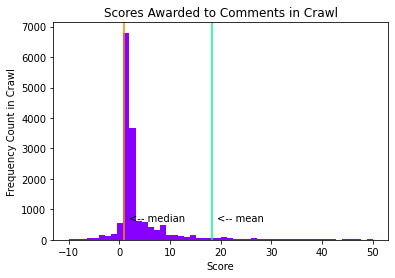

In [26]:
plt.hist(x = comments_df["score"], bins = 50, range = (-10, 50), color = "#8800ff");
plt.xlabel("Score")
plt.ylabel("Frequency Count in Crawl")
plt.axvline(x = np.mean(comments_df["score"]), color = "#00ff88")
plt.axvline(x = np.median(comments_df["score"]), color = "#ff8800") # orange is median
plt.title(label = "Scores Awarded to Comments in Crawl");
plt.annotate(s = "<-- mean", xy = (np.mean(comments_df["score"])+1,600));
plt.annotate(s = "<-- median", xy = (np.median(comments_df["score"])+1,600));

> ### The scores awarded to the comments in the crawl are right-skewed with a median value of 2.0 and a mean value of 37. The maximum score in the crawl was 9969.

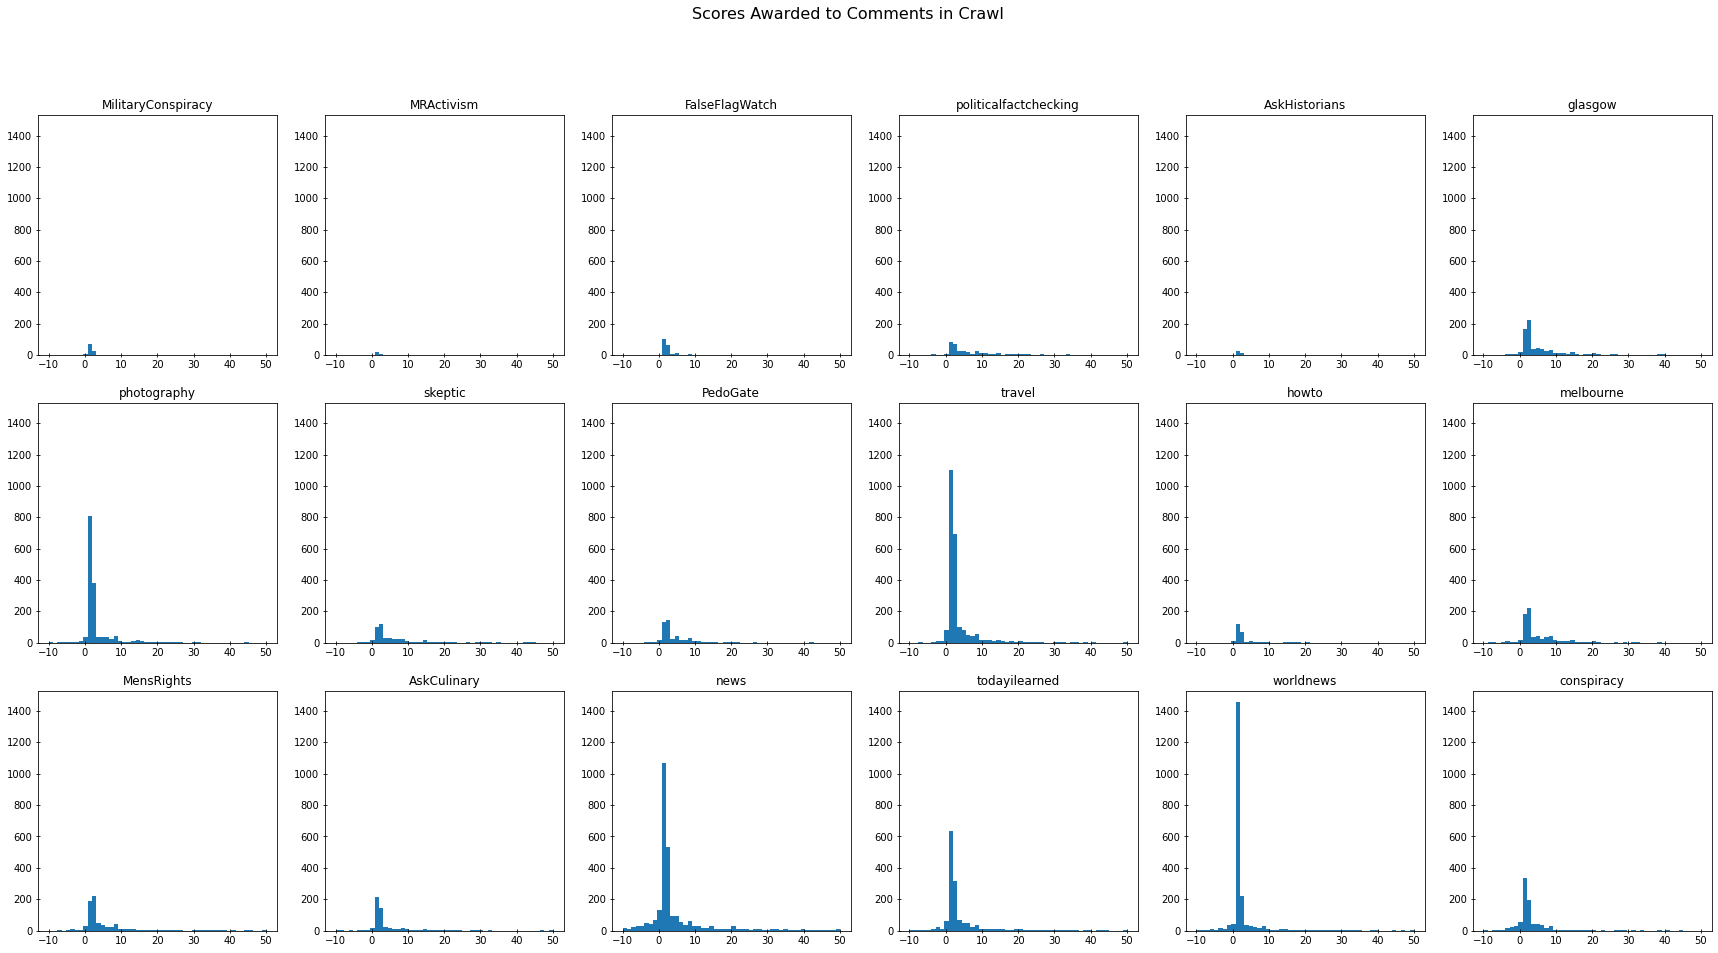

In [27]:
# all hists for scores

fig, axs = plt.subplots(nrows = 3, ncols = 6, sharex = True, sharey = True, figsize = (30,15));
fig.suptitle("Scores Awarded to Comments in Crawl", fontsize = 16);
counter = 0
for row in axs:
    for subplot in row:
        try:
            temp_df = comments_df[comments_df["subreddit_name"] == subreddit_list[counter]]
            subplot.hist(x = temp_df["score"], bins = 50, range = (-10, 50))
            subplot.tick_params(labelbottom = True, bottom = True, labelleft = True, left = True, direction = "inout")
            subplot.set_title(subreddit_list[counter])
            counter += 1
        except Exception as e:
            continue

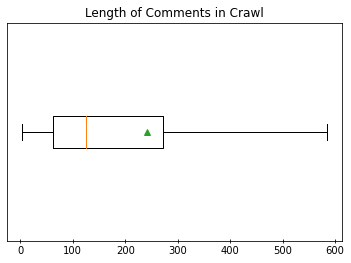

In [28]:
plt.boxplot(x = comments_df["body_len"], showfliers = False, vert = False, showmeans = True);
plt.tick_params(labelbottom = True, bottom = True, labelleft = False, left = False, direction = "inout")
plt.title(label = "Length of Comments in Crawl");

In [29]:
# np.mean(comments_df["body_len"]), np.median(comments_df["body_len"]), np.min(comments_df["body_len"]), np.max(comments_df["body_len"]), np.max(comments_df["body_len"])-np.min(comments_df["body_len"])

In [30]:
# q75, q25 = np.percentile(comments_df["body_len"], [75 ,25])
# q75 - q25

> ### Length of comments have a mean of 164 and a range of 5503 (6 to 5509). Similar to above, the boxplot may give a better sense of the location of the length of the comment data. The median is 100 and the IQR is ~133 (75th percentile = 188, 25th percentile = 55).

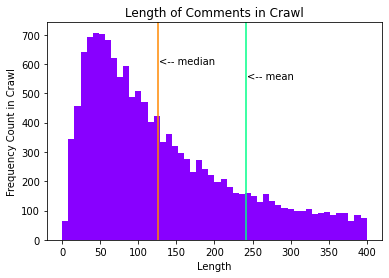

In [48]:
plt.hist(x = comments_df["body_len"], bins = 50, range = (0, 400), color = "#8800ff");
plt.xlabel("Length")
plt.ylabel("Frequency Count in Crawl")
plt.axvline(x = np.mean(comments_df["body_len"]), color = "#00ff88")
plt.axvline(x = np.median(comments_df["body_len"]), color = "#ff8800") # orange is median
plt.title(label = "Length of Comments in Crawl");
plt.annotate(s = "<-- mean", xy = (np.mean(comments_df["body_len"])+1,550));
plt.annotate(s = "<-- median", xy = (np.median(comments_df["body_len"])+1,600));

### Ngram analysis

In [32]:
from nltk import ngrams

comments_df["body_1gram"] = comments_df.apply(lambda x: [i for i in ngrams(x["body"].lower().split(),1)], axis = 1)
comments_df["body_2gram"] = comments_df.apply(lambda x: [i for i in ngrams(x["body"].lower().split(),2)], axis = 1)
comments_df["body_3gram"] = comments_df.apply(lambda x: [i for i in ngrams(x["body"].lower().split(),3)], axis = 1)

In [33]:
import collections

In [34]:
counter_1gram = collections.Counter()
for i in comments_df["body_1gram"]:
    counter_1gram.update(i)
    
for i in counter_1gram.most_common(10):
    print(i,"\n")

(('the',), 26792) 

(('to',), 18051) 

(('a',), 16684) 

(('and',), 15215) 

(('of',), 12234) 

(('in',), 9350) 

(('i',), 9183) 

(('is',), 8865) 

(('that',), 6976) 

(('it',), 6417) 



In [35]:
counter_2gram = collections.Counter()
for i in comments_df["body_2gram"]:
    counter_2gram.update(i)

for i in counter_2gram.most_common(10):
    print(i,"\n")

(('of', 'the'), 2448) 

(('in', 'the'), 2353) 

(('to', 'be'), 1153) 

(('to', 'the'), 1062) 

(('on', 'the'), 1052) 

(('is', 'a'), 961) 

(('and', 'the'), 842) 

(('for', 'the'), 771) 

(('if', 'you'), 740) 

(('in', 'a'), 702) 



In [36]:
counter_3gram = collections.Counter()
for i in comments_df["body_3gram"]:
    counter_3gram.update(i)
    
for i in counter_3gram.most_common(10):
    print(i,"\n")

(('a', 'lot', 'of'), 397) 

(('one', 'of', 'the'), 205) 

(('be', 'able', 'to'), 167) 

(('you', 'want', 'to'), 128) 

(('any', 'of', 'the'), 113) 

(('to', 'be', 'a'), 111) 

(('out', 'of', 'the'), 110) 

(('i', 'want', 'to'), 102) 

(('going', 'to', 'be'), 98) 

(('some', 'of', 'the'), 96) 



### Cleaning text for refined ngram analysis

In [37]:
from nltk.corpus import stopwords

In [38]:
punct = [":","'",".",",","!","?",")","(","''","&","*","^","$","#","@","~","`","+","/","|","-","--"]
nums = ["1","2","3","4","5","6","7","8","9","0"]

In [39]:
import re

In [40]:
# Remove single characters

replace_chars = []
for i in comments_df["body"]:
    these_chars = ""
    temp_text = i.lower().replace("b'","").replace('b"',"")
    for i in temp_text:
        if i in punct:
            these_chars += ""
        elif i in nums:
            these_chars += ""
        else:
            these_chars += i
    replace_chars.append(these_chars)

In [41]:
stopWords = set(stopwords.words('english'))

# Addl words to potentially add to stopWords
# tho, altho, eventho

In [42]:
# Remove whole tokens

replace_tokens = []
for i in replace_chars:
    temp = []
    for j in i.split():
        if j in stopWords:
            pass
        else:
            temp.append(j)
    replace_tokens.append(temp)

In [43]:
### Replace tokens with lemmas
# May be more general & interesting than actual tokens

In [44]:
### Find & remove hyperlinks (?)
# They take the form of [text to show](url for link). For instance,"There was [a similar scene where a flat earther refused to wear a mask](https://www.youtube.com/watch?v=avQe1ZWKoac)."

### Ngrams without punctuation, numbers, or stopwords

In [45]:
replace_1gram = []
for i in replace_tokens:
    temp = []
    for j in ngrams(i,1):
        temp.append(j)
    replace_1gram.append(temp)
    
counter_1gram = collections.Counter()
for i in replace_1gram:
    counter_1gram.update(i)

for i in counter_1gram.most_common(10):
    print(i,"\n")

(('like',), 2674) 

(('people',), 2370) 

(('would',), 2175) 

(('get',), 1867) 

(('one',), 1703) 

(('also',), 1253) 

(('time',), 1234) 

(('think',), 1212) 

(('really',), 1210) 

(('good',), 1147) 



In [46]:
replace_2gram = []
for i in replace_tokens:
    temp = []
    for j in ngrams(i,2):
        temp.append(j)
    replace_2gram.append(temp)

counter_2gram = collections.Counter()
for i in replace_2gram:
    counter_2gram.update(i)

for i in counter_2gram.most_common(10):
    print(i,"\n")

(('years', 'ago'), 147) 

(('social', 'media'), 138) 

(('sounds', 'like'), 121) 

(('looks', 'like'), 120) 

(('dont', 'know'), 117) 

(('go', 'back'), 112) 

(('make', 'sure'), 108) 

(('seems', 'like'), 100) 

(('hong', 'kong'), 96) 

(('dont', 'think'), 92) 



In [47]:
replace_3gram = []
for i in replace_tokens:
    temp = []
    for j in ngrams(i,3):
        temp.append(j)
    replace_3gram.append(temp)

counter_3gram = collections.Counter()
for i in replace_3gram:
    counter_3gram.update(i)

for i in counter_3gram.most_common(10):
    print(i,"\n")

(('bot', 'bleep', 'bloop'), 88) 

(('bleep', 'bloop', 'someone'), 87) 

(('bloop', 'someone', 'linked'), 87) 

(('someone', 'linked', 'thread'), 87) 

(('linked', 'thread', 'another'), 87) 

(('thread', 'another', 'place'), 87) 

(('another', 'place', 'reddit\\n\\n'), 87) 

(('follow', 'links', 'please'), 87) 

(('links', 'please', 'respect'), 87) 

(('please', 'respect', 'rules'), 87) 

